In [669]:
import pandas as pd
import numpy as np

In [670]:
df_transactions = pd.read_csv("../../../data/processed/data_tfidf.csv", sep=',')

In [671]:
df_transactions.shape

(253, 281)

In [672]:
df_transactions.head()

,category,0,1,2,3,4,5,6,7,8,...,270,271,272,273,274,275,276,277,278,279
0,Home,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,Parking,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,Other,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.515191,0.0,0.0,0.0
3,Salary,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,Home,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [673]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_transactions["category"] = le.fit_transform(df_transactions["category"])
df_transactions.head()

,category,0,1,2,3,4,5,6,7,8,...,270,271,272,273,274,275,276,277,278,279
0,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.515191,0.0,0.0,0.0
3,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [674]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = df_transactions.drop("category", axis=1)
y = df_transactions["category"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [675]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [676]:
y_pred = model.predict(X_test)

In [677]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

In [678]:
print(f"Accuracy =\t {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision =\t {precision_score(y_test, y_pred, average='weighted'):.2f}")
print(f"Recall =\t {recall_score(y_test, y_pred, average='weighted'):.2f}")

Accuracy =	 0.79
Precision =	 0.78
Recall =	 0.79


/Users/manu/Documents/repos/fineancial/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [679]:
import seaborn as sns
import matplotlib.pyplot as plt

/var/folders/bf/b11n35tn2rq9mr6mw11m8f7w0000gn/T/ipykernel_3234/4016298186.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


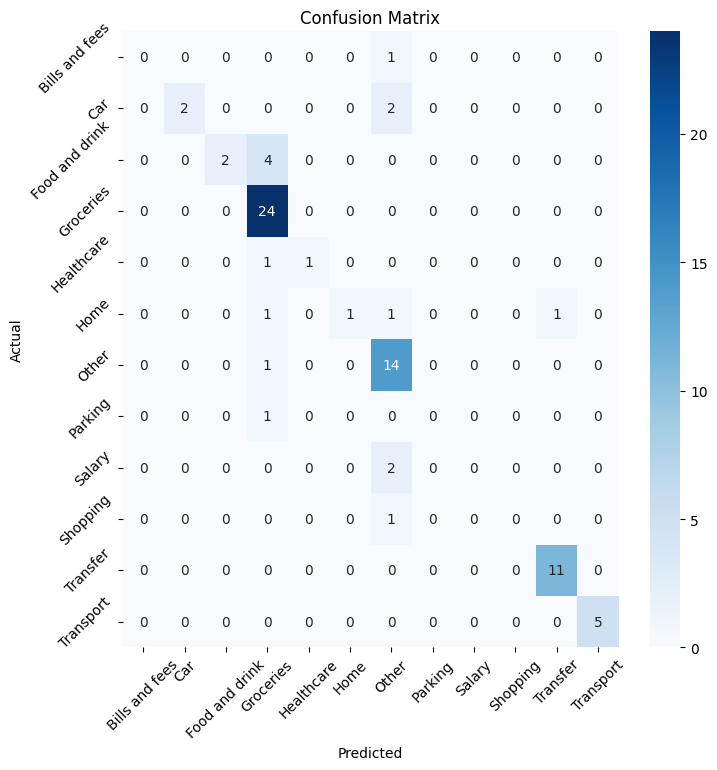

In [680]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", ax=ax)
ax.set_title("Confusion Matrix")
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
ax.set_xticklabels(le.inverse_transform([int(x.get_text()) for x in ax.get_xticklabels()]))
ax.set_yticklabels(le.inverse_transform([int(x.get_text()) for x in ax.get_yticklabels()]))
ax.tick_params(axis='x', rotation=45)
ax.tick_params(axis='y', rotation=45)
fig.show()

In [681]:
df_transactions_pred = pd.DataFrame()
df_transactions_pred["category"] = y_test
df_transactions_pred["category_pred"] = y_pred
df_transactions_pred

,category,category_pred
165,3,3
52,5,10
225,6,6
3,8,6
226,6,6
...,...,...
209,3,3
167,11,11
71,3,3
221,3,3
